In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import xgboost as xgb
import statsmodels.api as sm

/home/giuliano/anaconda3/envs/ML_39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_cruise = pd.read_csv("cruise_ship_info.csv")
df_cruise

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [3]:
df_drop = df_cruise.drop(columns = ["Ship_name", "Cruise_line"])

In [4]:
scaler = StandardScaler()

In [5]:
df_cruise_scaled = pd.DataFrame(scaler.fit_transform(df_drop), columns = df_drop.columns)
df_cruise_scaled

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610
...,...,...,...,...,...,...,...
153,0.831204,-1.830796,-1.844975,-2.987284,-1.907008,1.244688,-2.062826
154,-0.222599,0.148615,0.118448,0.368817,0.188457,-0.083716,1.204285
155,1.226380,-1.776662,-1.749603,-2.086730,-1.815023,-0.701471,-1.979788
156,1.489831,-1.776662,-1.740273,-2.086730,-1.815023,-0.912808,-1.979788


In [6]:
X = df_cruise_scaled.drop(columns = ["passengers"])
Y = df_cruise_scaled["passengers"]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.2, random_state = 42)

## Perceptron

hidden_layer_sizes = (1,1) => 1 Hidden-Layer mit einem Knoten == einfaches Perzeptron

In [8]:
clf = MLPRegressor(hidden_layer_sizes = (1,1), random_state = 1)

In [9]:

clf.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(1, 1), random_state=1)

In [10]:
percept_pred = clf.predict(X_test)

## MLPRegressor

In [11]:
mlpreg = MLPRegressor(random_state = 1)
mlpreg_rate = MLPRegressor(random_state = 1, learning_rate_init = 0.05)

In [12]:
#%%timeit
mlpreg.fit(X_train, Y_train)
mlpreg_rate.fit(X_train, Y_train)

MLPRegressor(learning_rate_init=0.05, random_state=1)

In [13]:
mlpreg_pred = mlpreg.predict(X_test)
mlpreg_pred_rate = mlpreg_rate.predict(X_test)

In [14]:
mlpreg_pred

array([-0.10343792, -0.65137134,  3.90028766, -1.65043971, -0.96866669,
        0.29412368,  1.83113745,  0.15871276,  0.10772613,  0.35326665,
        0.4034269 ,  0.10985577,  1.38144106, -0.61844917,  0.02315937,
        0.82266802,  0.07918082,  1.10685644,  0.09612984, -0.02123292,
       -0.67176313,  0.40033734,  0.43475832,  1.88855733,  0.32550179,
        0.6847104 ,  0.03073719,  0.18973039,  0.08139683, -1.54318732,
       -1.67870171,  0.74758142,  0.70676404, -0.53749553,  1.94520384,
       -0.81285065,  0.60765928, -0.58451005,  2.18959956, -1.66806339,
        0.11006597,  0.49843907,  0.84217342, -1.99010435, -0.5787693 ,
       -0.04877494,  1.3553782 ,  1.20903749,  1.12482062, -0.35721869,
       -0.88418577, -0.20398225,  1.14861797,  0.32550179, -0.02825684,
        0.76524453,  0.47703351,  0.67934268, -1.45307694, -0.65623456,
       -0.03843166, -0.22568881,  0.62253476,  2.34779193,  1.3298493 ,
       -0.68034678,  0.73779326, -1.15074112, -1.5111177 , -0.61

In [15]:
print(mlpreg_pred.size)
print(percept_pred.size)
print(Y_test.size)


127
127
127


## MSE und MAE

In [16]:
print("+++ Mean Squared Error +++")
print("Perceptron: " + str(mean_squared_error(Y_test, percept_pred)))
print("MLPRegressor: " + str(mean_squared_error(Y_test, mlpreg_pred)))
print("MLPRegressor Learning_rate = 0.1: " + str(mean_squared_error(Y_test, mlpreg_pred_rate)))
print()
print("+++ Mean Absolute Error +++")
print("Perceptron: " + str(mean_absolute_error(Y_test, percept_pred)))
print("MLPRegressor: " + str(mean_absolute_error(Y_test, mlpreg_pred)))
print("MLPRegressor Learning_rate = 0.1: " + str(mean_absolute_error(Y_test, mlpreg_pred_rate)))

+++ Mean Squared Error +++
Perceptron: 1.054985783636849
MLPRegressor: 0.03561226734692168
MLPRegressor Learning_rate = 0.1: 0.01599815278782372

+++ Mean Absolute Error +++
Perceptron: 0.810781369544405
MLPRegressor: 0.1420337690274375
MLPRegressor Learning_rate = 0.1: 0.10436090125434605


## Übung zu Regularisierung

### Lasso

In [17]:
lasso = Lasso(alpha = 0.1, random_state = 1)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1, random_state=1)

In [18]:
lasso_pred = lasso.predict(X_test)

In [19]:
print(lasso.coef_)

[-0.          0.06098758  0.          0.90513156 -0.          0.        ]


### Elastic Net

In [20]:
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 1)
elastic_net.fit(X_train, Y_train)

ElasticNet(alpha=1, random_state=1)

In [21]:
elastic_pred = elastic_net.predict(X_test)

### r2_score

In [22]:
print("R2 Score lasso:" + str(r2_score(Y_test, lasso_pred)))
print("R2 Score Elastic_Net:" + str(r2_score(Y_test, elastic_pred)))

R2 Score lasso:0.9508789280603954
R2 Score Elastic_Net:0.6608780400899648


### Split Plot

<ipython-input-23-616ddc406e3d>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(lambdas, coeff_lasso, 'bo-', label='Coef Lasso', color="darkblue", alpha=0.6, linewidth=3)
<ipython-input-23-616ddc406e3d>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(lambdas, coeff_elastic, 'bo-', label=r'Coef Elastic', color="darkred", alpha=0.6, linewidth=3)


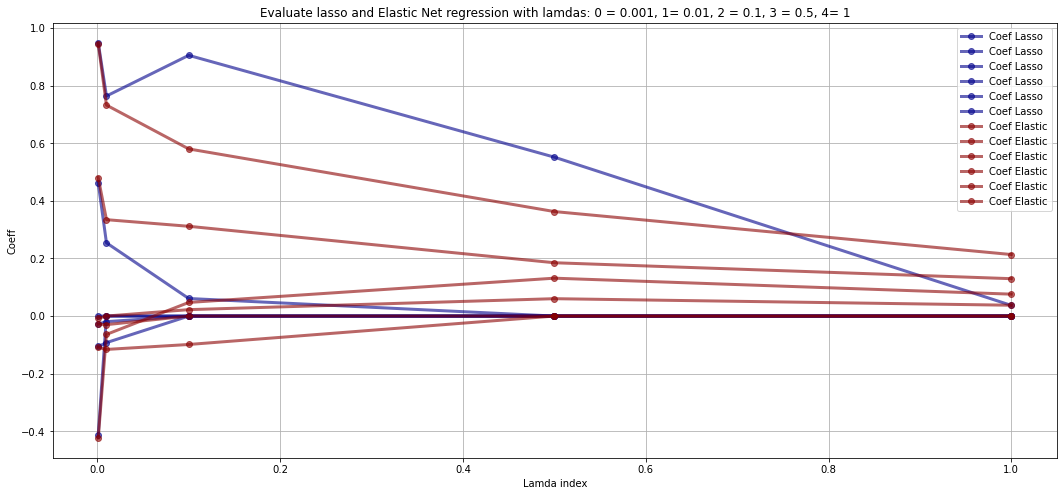

In [23]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1)
l_num = 5
pred_num = X.shape[1]

# prepare data for enumerate
coeff_lasso = np.zeros((l_num, pred_num))
coeff_elastic = np.zeros((l_num, pred_num))
lasso_r_squared = np.zeros(l_num)
elastic_r_squared = np.zeros(l_num)

for ind, i in enumerate(lambdas):    
    lasso = Lasso(alpha = i, random_state = 1)
    lasso.fit(X_train, Y_train)
    
    elastic_net = ElasticNet(alpha = i, l1_ratio = 0.5, random_state = 1)
    elastic_net.fit(X_train, Y_train)

    coeff_lasso[ind,:] = lasso.coef_
    coeff_elastic[ind,:] = elastic_net.coef_
    lasso_r_squared[ind] = lasso.score(X_train, Y_train)
    elastic_r_squared[ind] = elastic_net.score(X_train, Y_train)
    
plt.figure(figsize=(18, 8))
plt.plot(lambdas, coeff_lasso, 'bo-', label='Coef Lasso', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(lambdas, coeff_elastic, 'bo-', label=r'Coef Elastic', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel('Coeff')
plt.title(r'Evaluate lasso and Elastic Net regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1')
plt.legend(loc='best')
plt.grid()

## XGBoost

In [24]:
xgb_reg = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, use_label_encoder = False, random_state = 0)
xgb_reg.fit(X_train, Y_train)

/home/giuliano/anaconda3/envs/ML_39/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=None)

In [25]:
xgb_pred = xgb_reg.predict(X_test)

surrogate_glm = sm.GLM(xgb_pred, X_test, family=sm.families.Poisson())
surrogate_glm_fit =surrogate_glm.fit()

lasso_glm = sm.GLM(lasso_pred, X_test, family=sm.families.Poisson())
lasso_glm_fit = lasso_glm.fit()

elastic_glm = sm.GLM(elastic_pred, X_test, family=sm.families.Poisson())
elastic_glm_fit = elastic_glm.fit()

#u, s, vt = np.linalg.svd(lasso_glm.exog, 0)
#print(s)


print(surrogate_glm_fit.summary())
print(lasso_glm_fit.summary())
print(elastic_glm_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  127
Model:                            GLM   Df Residuals:                      121
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.22
Date:                Sat, 23 Apr 2022   Deviance:                       3596.6
Time:                        13:21:22   Pearson chi2:                     554.
No. Iterations:                     8   Pseudo R-squ. (CS):            -0.5545
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                  -0.1310      0.11

/home/giuliano/anaconda3/envs/ML_39/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:458: RuntimeWarning: invalid value encountered in log
  return var_weights / scale * (endog * np.log(mu) - mu -


## Shapley Values

In [26]:
import shap
shap.initjs()

/home/giuliano/anaconda3/envs/ML_39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
shap_explainer_lasso = shap.LinearExplainer(masker=X_test,model=lasso)
shap_explainer_elastic = shap.LinearExplainer(masker=X_test,model=elastic_net)
#shap_values_glm = shap_explainer_glm.shap_values(X_test)

shap_values_lasso = shap_explainer_lasso.shap_values(X_test)
shap_values_elastic = shap_explainer_elastic.shap_values(X_test)

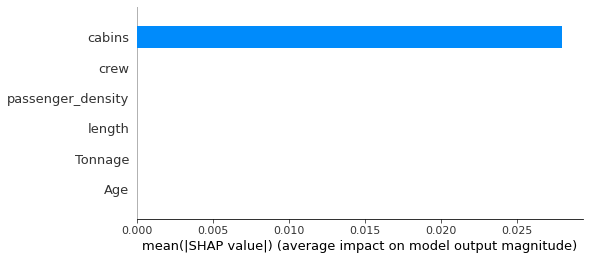

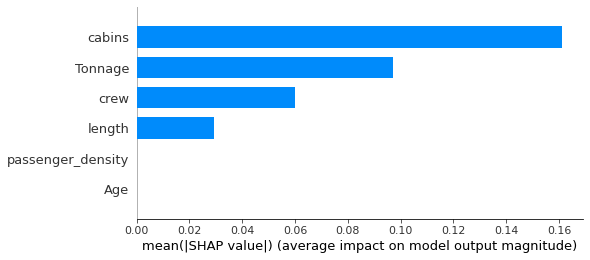

In [28]:
feature_names=['Age', 'Tonnage', 'length', 'cabins', 'passenger_density', 'crew']
shap.summary_plot(shap_values_lasso, plot_type="bar",feature_names=feature_names)
shap.summary_plot(shap_values_elastic, plot_type="bar",feature_names=feature_names)

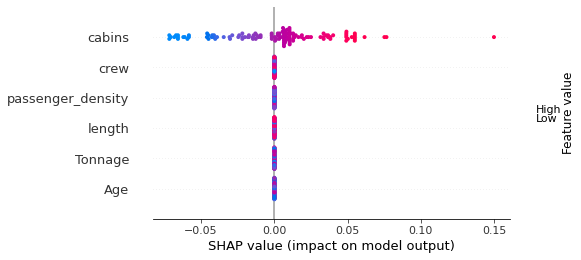

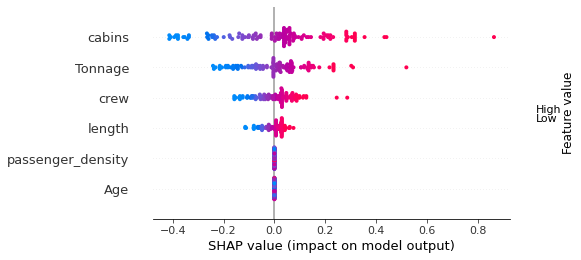

In [29]:
shap.summary_plot(shap_values_lasso, X_test)
shap.summary_plot(shap_values_elastic, X_test)

In [30]:
from xgboost import DMatrix
import tqdm

feature_names=['Age', 'Tonnage', 'length', 'cabins', 'passenger_density', 'crew']

def ManualExplainer(X,y,pred,verbose=False):
    line_num = len(X)
    num_features=X.shape[1]
    if(verbose):
        print("Anzahl der Merkmale",num_features)
    shap_values = np.zeros(X.shape)
    average_feature_value = np.zeros((3,num_features))
    # First, get vaerage value for each feature:
    average_feature_value = np.mean(X)
    print("Mittlere Feature-Werte: ",average_feature_value)
    
    line = range(0,line_num)
    for line in tqdm.notebook.tqdm(line, total=line_num, desc="Bestimme SHAP-Values..."):
        #
        # Die Kalkulation der Shaplay-Values an dieser Stelle ist unvollständig, da u.a. aus Laufzeitgründen) statt der vollständigen differenzialen Marginalkontributionen
        # nur die Differenz zwischen dem Vorhergesagtem Wert und dem Vorhersagewert des Mittelwertes des geprüften merkmals berechnet wird.
        # Dies ist eigentlich nur zulässig, wenn die Merkmale vollständig IID sind und alle Modell-Effekte linear sind.
        # Beides ist hier streng genommen nicht der Fall, die Implementierung der korrekt permutierten Marginaleffekte für alle Merkmalskombinationen verbleibt daher als Übung.
        # Dazu muss "nur" die innere Schleife angepasst werden.
        #
        for feature in range(0,num_features):
            if(verbose):
                print("### Adressing Feature #",feature_names[feature])
            input_shap = pd.DataFrame([X.iloc[line]],columns = feature_names)
            input_shap.iloc[0,feature] = average_feature_value[feature]
            if(verbose):
                print("Input_SHAP",input_shap)
            input_X = pd.DataFrame([X.iloc[line]],columns = feature_names)
            if(verbose):
                print("Input_X",input_X)
            shap_values[line,feature] = pred(DMatrix(input_X)) - pred(DMatrix(input_shap)) # Observation-Vorhersage minus Erwartungswert-Vorhersage. ACHTUNG: Formell nur korrekt, wenn das geprüfte Modell linear in den Features ist.
        if(verbose):
            print("### Resultat: ",shap_values[line])
    return shap_values
    
shap_values_xgb = ManualExplainer(X_test,xgb_reg.get_booster().predict(DMatrix(X_test)),xgb_reg.get_booster().predict)
#shap_values_lasso = ManualExplainer(X_test,lasso.get_booster().predict(DMatrix(X_test)),lasso.get_booster().predict)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


Mittlere Feature-Werte:  Age                 -0.028641
Tonnage              0.048707
length               0.053379
cabins               0.058526
passenger_density   -0.032176
crew                 0.063173
dtype: float64


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
shap.summary_plot(shap_values_xgb, plot_type="bar",feature_names=feature_names)
shap.summary_plot(shap_values_xgb, X_test)

In [ ]:
for i in range(6):
    shap.dependence_plot(i,shap_values_elastic, X_test,color=shap_values_elastic[0])